In [176]:
# -*- coding: utf-8 -*-
import random
import time
from threading import Thread
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import sys
import copy

from sort_functions import *

In [37]:
def sort_hybrid(A, threshold = 100, hybrid_sort = False):
    time_start = time.time()
    quick_sort_mod(A, 0, len(A)-1, threshold, hybrid_sort)
    return (time.time() - time_start)
    

In [180]:
def quick_sort_mod(A, low, hi, threshold, hybrid_sort):
    
    if hi-low < threshold and low < hi and hybrid_sort:
        insertion_sort(A, low, hi)
    elif low < hi:
        p = partition(A, low, hi)
        quick_sort_mod(A, low, p - 1, threshold, hybrid_sort)
        quick_sort_mod(A, p + 1, hi, threshold, hybrid_sort)
        

In [184]:
def optimize_threshold(random_array = False, btn_threshold_line = 2, top_threshold_line = 5, num_arrays = 10):
    
    if random_array:
        data = np.random.randint(0, 1000000, (num_arrays, 100000))
    else:
        data = np.load("data.npy")
    data = data.tolist() 
    res = []
    
    for trd in range(btn_threshold_line, top_threshold_line):
        print("threshold: ", trd)
    
        times_hybr = []
        times_clear = []
        
        A = copy.deepcopy(data)
        B = copy.deepcopy(data)
        for i in range(len(data)):
            times_hybr.append(sort_hybrid(A[i], threshold = trd, hybrid_sort = True))
            times_clear.append(sort_hybrid(B[i], hybrid_sort = False))

        res.append([trd, np.array(times_hybr).mean(), np.array(times_clear).mean()])
#     plt.plot(np.arange(len(A[0])), A[0])
    res = np.array(res)
    np.save("data.npy", data)
    np.save("thresholds.npy", res)
    return res
    
            

threshold:  4
threshold:  5
threshold:  6
threshold:  7
threshold:  8
threshold:  9
threshold:  10
threshold:  11
threshold:  12
threshold:  13
threshold:  14
threshold:  15
threshold:  16
threshold:  17
threshold:  18
threshold:  19
threshold:  20
threshold:  21
threshold:  22
threshold:  23
threshold:  24
threshold:  25
threshold:  26
threshold:  27
threshold:  28
threshold:  29
threshold:  30
threshold:  31
threshold:  32
threshold:  33
threshold:  34
threshold:  35
threshold:  36
threshold:  37
threshold:  38
threshold:  39
threshold:  40
threshold:  41
threshold:  42
threshold:  43
threshold:  44
threshold:  45
threshold:  46
threshold:  47
threshold:  48
threshold:  49
threshold:  50
threshold:  51
threshold:  52
threshold:  53
threshold:  54
threshold:  55
threshold:  56
threshold:  57
threshold:  58
threshold:  59
threshold:  60
threshold:  61
threshold:  62
threshold:  63
threshold:  64
threshold:  65
threshold:  66
threshold:  67
threshold:  68
threshold:  69
threshold:  70
t

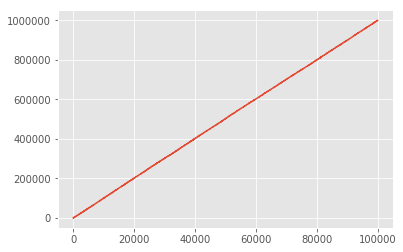

In [186]:
ooo = optimize_threshold(random_array=False, btn_threshold_line=4, top_threshold_line=100, num_arrays=20)

In [187]:
ooo.shape

(96, 3)

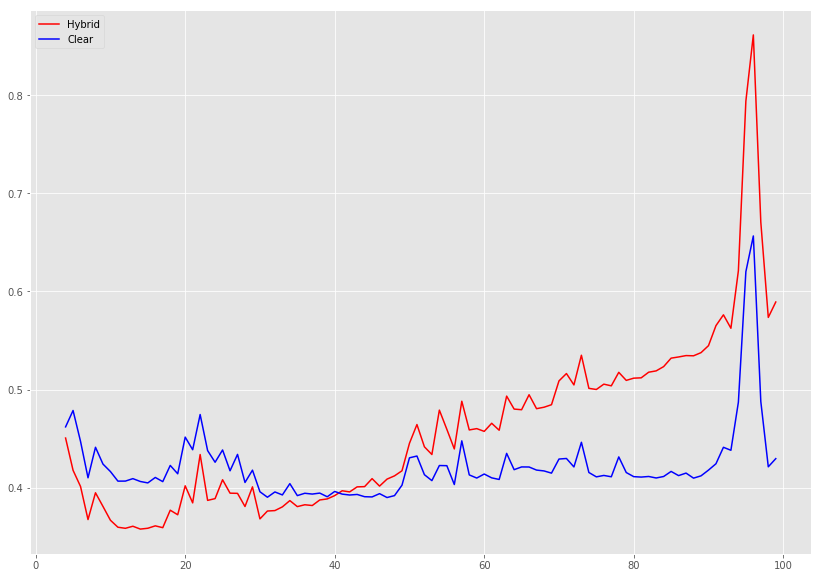

In [188]:
fig, ax = plt.subplots(figsize=(14, 10))


ax.plot(ooo[:, 0], ooo[:,1], c='r', label = "Hybrid")

ax.plot(ooo[:, 0], ooo[:,2], c='b', label = "Clear")
ax.legend()
plt.show()

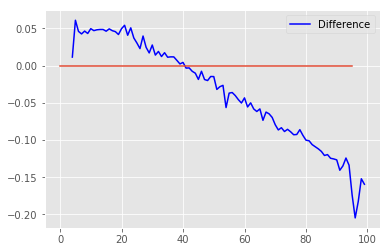

In [206]:
plt.plot(ooo[:, 0], ooo[:,2] - ooo[:,1], c='b', label = "Difference")
plt.plot(np.arange(len(ooo)), [0]*len(ooo))
plt.legend()